In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def visualize_emb_generalization(emb_path):
    embeddings = np.load(emb_path)
    embeddings = embeddings.reshape(embeddings.shape[0], -1)
    rsm = np.corrcoef(embeddings)
    generalization = rsm.mean(axis=1)
    plt.imshow(rsm, vmin = 0)
    plt.title("Embedding RSM across time")
    plt.colorbar()
    plt.show()
    plt.plot(generalization)
    plt.show()

def compute_rdm_generalization(rdm): 
    def flatten_rdm(rdm):
        triu_indices = np.triu_indices(rdm.shape[-1], k=1)
        return rdm[..., triu_indices[0], triu_indices[1]]
    
    def compute_time_rsm(rdm):
        rdm_flat = flatten_rdm(rdm)
        time_rsm = np.corrcoef(rdm_flat)
        # time_rsm = 1 - squareform(pdist(rdm_flat, metric='euclidean'))
        return time_rsm
    
    time_rsm = compute_time_rsm(rdm)
    time_generalization = time_rsm.mean(axis=1)
    return time_rsm, time_generalization


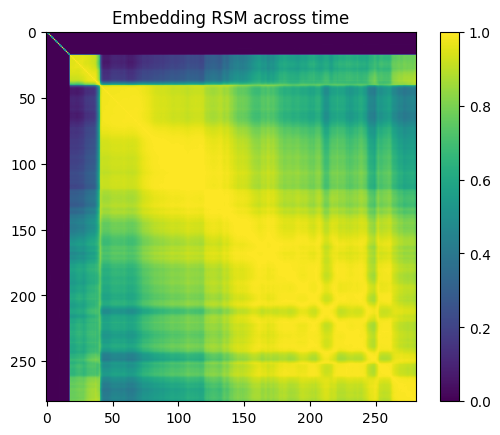

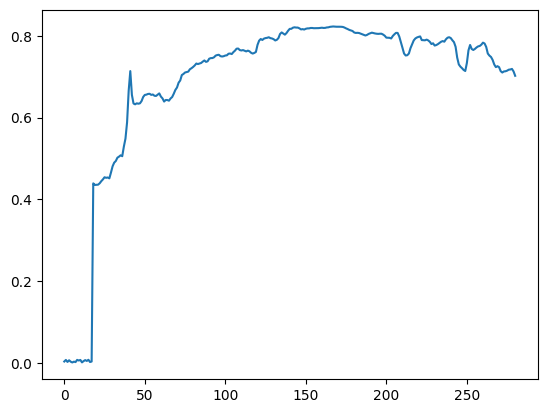

In [2]:
path = '../../output/cliphba_dynamic_66d_official_v2/things/embeddings_-100ms-1300ms-5step.npy'
# path = '../../output/cliphba_individual_things/things/mean_embs.npy'
visualize_emb_generalization(path)

(281, 1854, 1854)
(281, 281)


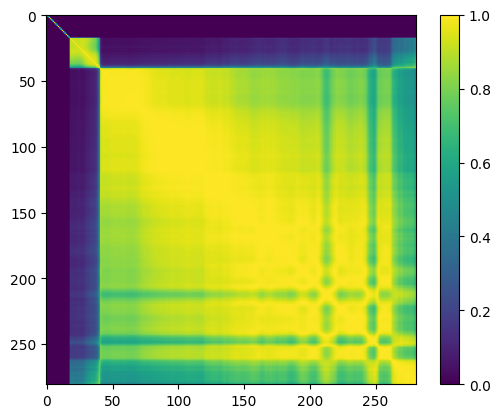

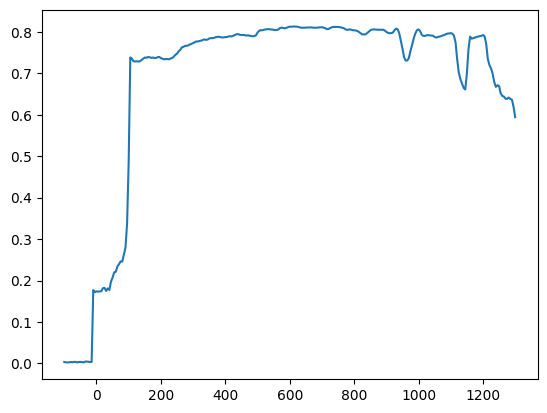

In [3]:
path = '../../output/cliphba_dynamic_66d_official_v2/things/rdms_-100ms-1300ms-5step.npy'
# path = '../../output/cliphba_individual_things/things/mean_rdms.npy'
embeddings = np.load(path)

# Compute RDM long the last 2 dimensions

t_rdm = []
for t in range(embeddings.shape[0]):
    emb = embeddings[t]
    rdm = np.corrcoef(emb)
    t_rdm.append(rdm)

t_rdm = np.array(t_rdm)
print(t_rdm.shape)

time_rsm, time_generalization = compute_rdm_generalization(t_rdm)

print(time_rsm.shape)

plt.imshow(time_rsm, vmin=0)
plt.colorbar()
plt.show()

# plt.text(0.5, -0.2, "noise = 0.0 richness curve,  richness = generalization curve, penalty = richness curve, stepwise training (MSE + Pearson, then G Loss)")

# also plot the time generalization
plt.plot(list(range(-100, 1301, 5)), time_generalization)
plt.show()


In [4]:
# path = "../../output/cliphba_dynamic_3d_v5/things/rdms_-100ms-1300ms-5step.npy"

# rdms = np.load(path)

# time_rsm, time_generalizartion = compute_rdm_generalization(rdms)

# time_rsm.shape

# plt.imshow(time_rsm)
# plt.colorbar()
# plt.show()

# # also plot the time generalization
# plt.plot(list(range(-100, 1301, 5)), time_generalizartion)
# plt.show()


In [5]:
path = "../Data/ThingsMEG_RDMs/ThingsMEG_RDM_4P.npy"

rdms = np.load(path)
rdms = np.nan_to_num(rdms)
rdms = np.mean(rdms, axis=0)
# rdms = rdms[0]
rdms.shape

(281, 1854, 1854)

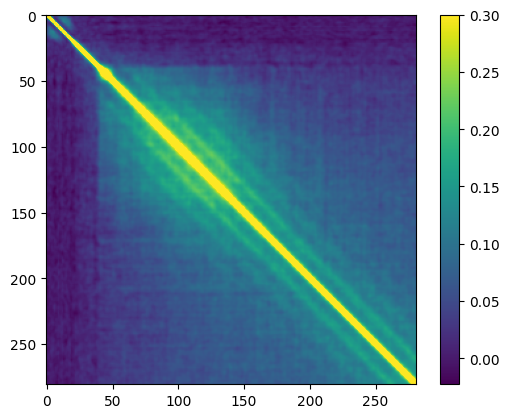

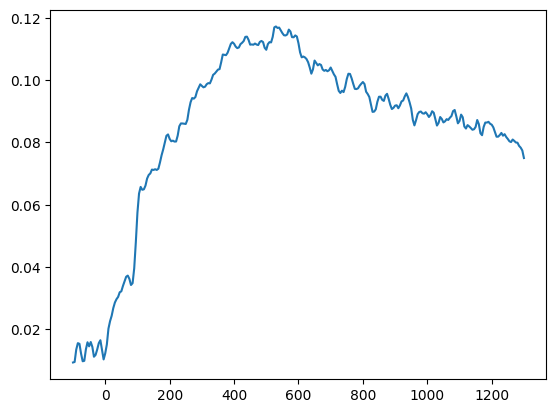

In [6]:
time_rsm, time_generalization = compute_rdm_generalization(rdms)

time_rsm.shape

plt.imshow(time_rsm, vmax = 0.3)
plt.colorbar()
plt.show()

# also plot the time generalization
plt.plot(list(range(-100, 1301, 5)), time_generalization)
plt.show()
